In [1]:
import ROOT, math

Welcome to JupyROOT 6.30/06


In [2]:
FileMBGen  = ROOT.TFile("Input/MinBiasMC_Gen.root")
FileMBReco = ROOT.TFile("Input/MinBiasMC_Reco.root")
FileDYGen  = ROOT.TFile("Input/DYLLMC_Gen.root")
FileDYReco = ROOT.TFile("Input/DYLLMC_Reco.root")
FilePPGen  = ROOT.TFile("Input/PPMC_Gen.root")
FilePPReco = ROOT.TFile("Input/PPMC_Reco.root")

def CleanUp():
    FileMBGen.Close()
    FileMBReco.Close()
    FileDYGen.Close()
    FileDYReco.Close()
    FilePPGen.Close()
    FilePPReco.Close()

TreeMBGen  = FileMBGen.Get("Tree")
TreeMBReco = FileMBReco.Get("Tree")
TreeDYGen  = FileDYGen.Get("Tree")
TreeDYReco = FileDYReco.Get("Tree")
TreePPGen  = FilePPGen.Get("Tree")
TreePPReco = FilePPReco.Get("Tree")

In [3]:
Canvas = ROOT.TCanvas("Canvas", "")

PP Gen =  816.6339583431051
PP Reco =  1278.962582846698
PP Reco (PU = 0) =  753.799024495641
PP Reco (PV = 1) =  770.3985883794101
Embedded Gen SubEvent0 =  816.3971626191625


Warning in <TFile::Append>: Replacing existing TH1: HPPGenHF (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HPPRecoHF (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HPPRecoPU0HF (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HPPRecoPV1HF (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HDYSubEvent0HF (Potential memory leak).


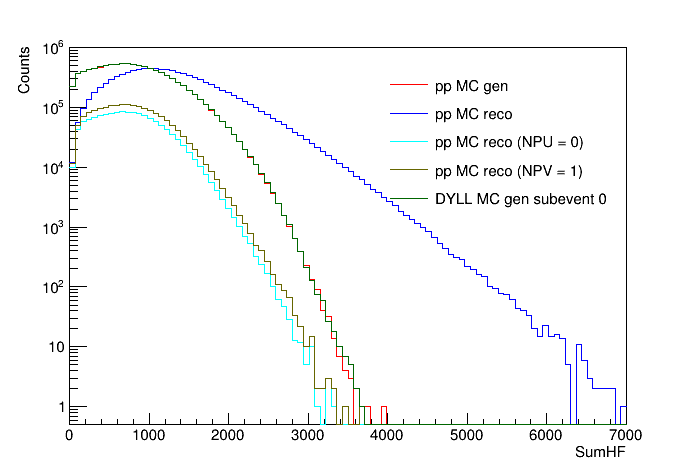

In [14]:
# First let's start by looking at HF distributions for a few different things

HPPGenHF = ROOT.TH1D("HPPGenHF", ";SumHF;Counts", 100, 0, 7000)
HPPRecoHF = ROOT.TH1D("HPPRecoHF", "", 100, 0, 7000)
HPPRecoPU0HF = ROOT.TH1D("HPPRecoPU0HF", "", 100, 0, 7000)
HPPRecoPV1HF = ROOT.TH1D("HPPRecoPV1HF", "", 100, 0, 7000)
HDYSubEvent0HF = ROOT.TH1D("HDYSubEvent0HF", "", 100, 0, 7000)

HPPGenHF.SetStats(0)

HPPGenHF.SetLineColor(ROOT.kRed)
HPPRecoHF.SetLineColor(ROOT.kBlue)
HPPRecoPU0HF.SetLineColor(ROOT.kCyan)
HPPRecoPV1HF.SetLineColor(ROOT.kYellow + 3)
HDYSubEvent0HF.SetLineColor(ROOT.kGreen + 3)

TreePPGen.Draw("SignalHF>>HPPGenHF")
TreePPReco.Draw("SignalHF>>HPPRecoHF", "", "same")
TreePPReco.Draw("SignalHF>>HPPRecoPU0HF", "NPU == 0", "same")
TreePPReco.Draw("SignalHF>>HPPRecoPV1HF", "NVertex == 1", "same")
TreeDYGen.Draw("SubEvent0HF>>HDYSubEvent0HF", "", "same")

Legend = ROOT.TLegend(0.55, 0.85, 0.85, 0.55)
Legend.SetFillStyle(0)
Legend.SetTextFont(42)
Legend.SetTextSize(0.035)
Legend.SetBorderSize(0)
Legend.AddEntry(HPPGenHF, "pp MC gen", "l")
Legend.AddEntry(HPPRecoHF, "pp MC reco", "l")
Legend.AddEntry(HPPRecoPU0HF, "pp MC reco (NPU = 0)", "l")
Legend.AddEntry(HPPRecoPV1HF, "pp MC reco (NPV = 1)", "l")
Legend.AddEntry(HDYSubEvent0HF, "DYLL MC gen subevent 0", "l")
Legend.Draw()

Canvas.SetLogy()
Canvas.Draw()

print("PP Gen = ", HPPGenHF.GetMean())
print("PP Reco = ", HPPRecoHF.GetMean())
print("PP Reco (PU = 0) = ", HPPRecoPU0HF.GetMean())
print("PP Reco (PV = 1) = ", HPPRecoPV1HF.GetMean())
print("Embedded Gen SubEvent0 = ", HDYSubEvent0HF.GetMean())


Warning in <TFile::Append>: Replacing existing TH1: PSignalHFVsNPV (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: PSignalHFVsNPU (Potential memory leak).


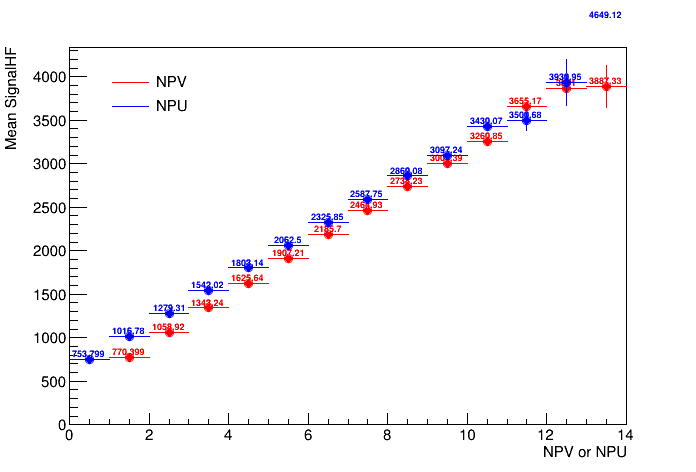

In [15]:
PSignalHFVsNPV = ROOT.TProfile("PSignalHFVsNPV", ";NPV or NPU;Mean SignalHF", 14, 0, 14)
PSignalHFVsNPU = ROOT.TProfile("PSignalHFVsNPU", ";NPV or NPU;Mean SignalHF", 14, 0, 14)

TreePPReco.Draw("SignalHF:NVertex>>PSignalHFVsNPV", "", "prof text0")
TreePPReco.Draw("SignalHF:NPU>>PSignalHFVsNPU", "", "prof text0 same")

PSignalHFVsNPV.SetStats(0)

PSignalHFVsNPV.SetMarkerStyle(20)
PSignalHFVsNPV.SetMarkerColor(ROOT.kRed)
PSignalHFVsNPV.SetLineColor(ROOT.kRed)
PSignalHFVsNPU.SetMarkerStyle(20)
PSignalHFVsNPU.SetMarkerColor(ROOT.kBlue)
PSignalHFVsNPU.SetLineColor(ROOT.kBlue)

Legend = ROOT.TLegend(0.15, 0.85, 0.45, 0.75)
Legend.SetFillStyle(0)
Legend.SetTextFont(42)
Legend.SetTextSize(0.035)
Legend.SetBorderSize(0)
Legend.AddEntry(PSignalHFVsNPV, "NPV", "l")
Legend.AddEntry(PSignalHFVsNPU, "NPU", "l")
Legend.Draw()

Canvas.SetLogy(False)
Canvas.Draw()

True

 FCN=100.181 FROM MIGRAD    STATUS=CONVERGED    1082 CALLS        1083 TOTAL
                     EDM=4.48243e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.63154e+02   1.84152e+00   3.66096e-03   3.05812e-06
   2  p1           1.01300e+02   2.71407e+00   7.79492e-03   1.66604e-05
   3  p2           9.66647e-02   6.57148e-03   1.32287e-05  -1.37607e-02
 FCN=82.6348 FROM MIGRAD    STATUS=CONVERGED     616 CALLS         617 TOTAL
                     EDM=4.38493e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.44308e+02   2.04657e+00   3.81003e-03  -6.69996e-05
   2  p1           1.00104e+02   3.15524e+00   8.26326e-03   1.13299e-04
   3  p2           1.01191e-01   

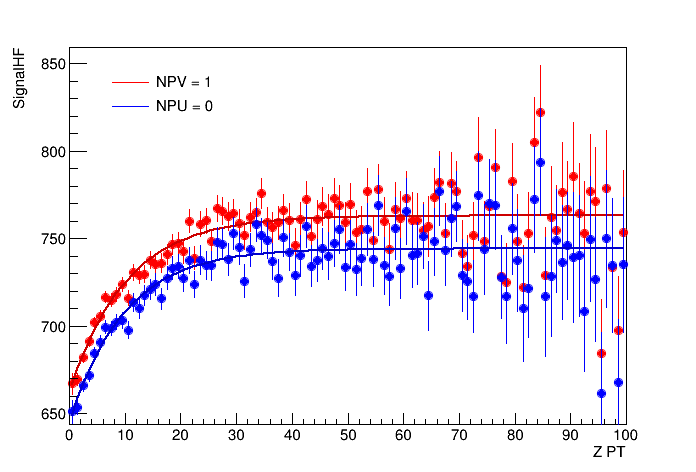

In [6]:
PSignalHFVsZPT_NPV1 = ROOT.TProfile("PSignalHFVsZPT_NPV1", ";Z PT;SignalHF", 100, 0, 100)
PSignalHFVsZPT_NPU0 = ROOT.TProfile("PSignalHFVsZPT_NPU0", "", 100, 0, 100)

PSignalHFVsZPT_NPV1.SetStats(0)
PSignalHFVsZPT_NPU0.SetStats(0)

PSignalHFVsZPT_NPV1.SetMarkerStyle(20)
PSignalHFVsZPT_NPV1.SetMarkerColor(ROOT.kRed)
PSignalHFVsZPT_NPV1.SetLineColor(ROOT.kRed)
PSignalHFVsZPT_NPU0.SetMarkerStyle(20)
PSignalHFVsZPT_NPU0.SetMarkerColor(ROOT.kBlue)
PSignalHFVsZPT_NPU0.SetLineColor(ROOT.kBlue)

TreePPReco.Draw("SignalHF:zPt[0]>>PSignalHFVsZPT_NPV1", "NVertex == 1 && zPt[0] < 100", "prof")
TreePPReco.Draw("SignalHF:zPt[0]>>PSignalHFVsZPT_NPU0", "NPU == 0 && zPt[0] < 100", "prof same")

FSignalHFVsZPT_NPV1 = ROOT.TF1("FSignalHFVsZPT_NPV1", "[0]-[1]*exp(-[2]*x)", 0, 100)
FSignalHFVsZPT_NPU0 = ROOT.TF1("FSignalHFVsZPT_NPU0", "[0]-[1]*exp(-[2]*x)", 0, 100)

FSignalHFVsZPT_NPV1.SetLineColor(ROOT.kRed + 1)
FSignalHFVsZPT_NPU0.SetLineColor(ROOT.kBlue + 1)

PSignalHFVsZPT_NPV1.Fit(FSignalHFVsZPT_NPV1)
PSignalHFVsZPT_NPU0.Fit(FSignalHFVsZPT_NPU0)

Legend = ROOT.TLegend(0.15, 0.85, 0.45, 0.75)
Legend.SetFillStyle(0)
Legend.SetTextFont(42)
Legend.SetTextSize(0.035)
Legend.SetBorderSize(0)
Legend.AddEntry(PSignalHFVsZPT_NPV1, "NPV = 1", "l")
Legend.AddEntry(PSignalHFVsZPT_NPU0, "NPU = 0", "l")
Legend.Draw()

Canvas.SetLogy(False)
Canvas.Draw()

TreePPReco.SetAlias("NPVZPTShift", f"({FSignalHFVsZPT_NPV1.GetParameter(0)}-{FSignalHFVsZPT_NPV1.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPV1.GetParameter(2)}*zPt[0]))")
TreePPReco.SetAlias("NPUZPTShift", f"({FSignalHFVsZPT_NPU0.GetParameter(0)}-{FSignalHFVsZPT_NPU0.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPU0.GetParameter(2)}*zPt[0]))")
TreeDYReco.SetAlias("NPVZPTShift", f"({FSignalHFVsZPT_NPV1.GetParameter(0)}-{FSignalHFVsZPT_NPV1.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPV1.GetParameter(2)}*zPt[0]))")
TreeDYReco.SetAlias("NPUZPTShift", f"({FSignalHFVsZPT_NPU0.GetParameter(0)}-{FSignalHFVsZPT_NPU0.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPU0.GetParameter(2)}*zPt[0]))")

Warning in <TFile::Append>: Replacing existing TH1: PDYSignalHFVsAll_NPU (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: PDYSignalHFVsAll_NPV (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: PMBSignalHFVsAll (Potential memory leak).


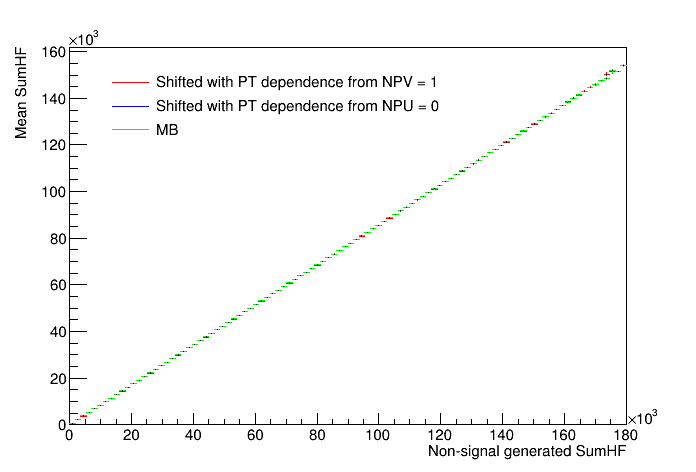

In [19]:
PDYSignalHFVsAll_NPU = ROOT.TProfile("PDYSignalHFVsAll_NPU", ";Non-signal generated SumHF;Mean SumHF", 100, 0, 180000)
PDYSignalHFVsAll_NPV = ROOT.TProfile("PDYSignalHFVsAll_NPV", "", 100, 0, 180000)
PMBSignalHFVsAll = ROOT.TProfile("PMBSignalHFVsAll", "", 100, 0, 180000)

PDYSignalHFVsAll_NPU.SetLineColor(ROOT.kBlue)
PDYSignalHFVsAll_NPV.SetLineColor(ROOT.kRed)
PMBSignalHFVsAll.SetLineColor(ROOT.kGreen)

PDYSignalHFVsAll_NPU.SetStats(0)
PDYSignalHFVsAll_NPV.SetStats(0)
PMBSignalHFVsAll.SetStats(0)

TreeDYReco.Draw("SignalHF-NPUZPTShift:SubEventAllHF-SubEvent0HF>>PDYSignalHFVsAll_NPU", "zPt[0] > 20", "prof")
TreeDYReco.Draw("SignalHF-NPVZPTShift:SubEventAllHF-SubEvent0HF>>PDYSignalHFVsAll_NPV", "zPt[0] > 20", "prof same")
TreeMBReco.Draw("SignalHF:SubEventAllHF>>PMBSignalHFVsAll", "", "prof same")

Legend = ROOT.TLegend(0.15, 0.85, 0.45, 0.70)
Legend.SetFillStyle(0)
Legend.SetTextFont(42)
Legend.SetTextSize(0.035)
Legend.SetBorderSize(0)
Legend.AddEntry(PDYSignalHFVsAll_NPV, "Shifted with PT dependence from NPV = 1", "l")
Legend.AddEntry(PDYSignalHFVsAll_NPU, "Shifted with PT dependence from NPU = 0", "l")
Legend.AddEntry(PMBSignalHFVsAll, "MB", "l")
Legend.Draw()

Canvas.Draw()

True

****************************************
Minimizer is Linear / Migrad
Chi2                      =      119.538
NDf                       =           97
p0                        =     -64.0674   +/-   1.41402     
p1                        =   -1.147e-05   +/-   4.54741e-05 
****************************************
Minimizer is Linear / Migrad
Chi2                      =      119.535
NDf                       =           97
p0                        =     -82.3698   +/-   1.41402     
p1                        = -1.14896e-05   +/-   4.54741e-05 


Warning in <TFile::Append>: Replacing existing TH1: HDiffSignalHFVsAll_NPU (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HDiffSignalHFVsAll_NPV (Potential memory leak).


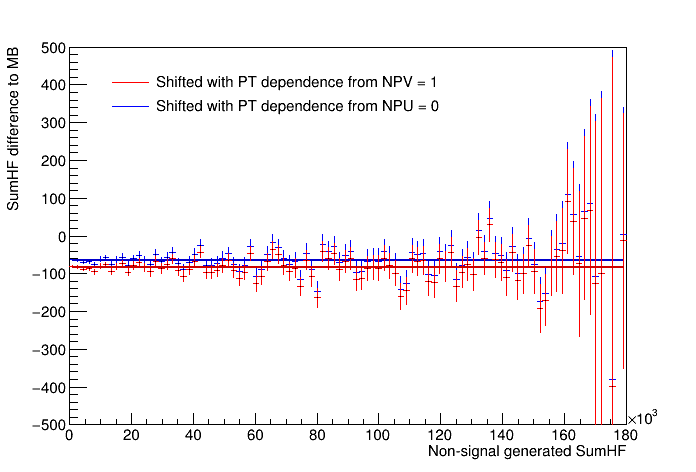

In [20]:
HDiffSignalHFVsAll_NPU = ROOT.TH1D("HDiffSignalHFVsAll_NPU", ";Non-signal generated SumHF;SumHF difference to MB", 100, 0, 180000)
HDiffSignalHFVsAll_NPV = ROOT.TH1D("HDiffSignalHFVsAll_NPV", "", 100, 0, 180000)
for i in range(1, 101):
    HDiffSignalHFVsAll_NPU.SetBinContent(i, PDYSignalHFVsAll_NPU.GetBinContent(i) - PMBSignalHFVsAll.GetBinContent(i))
    HDiffSignalHFVsAll_NPU.SetBinError(i, math.sqrt(PDYSignalHFVsAll_NPU.GetBinError(i)**2 + PMBSignalHFVsAll.GetBinError(i)**2))
    HDiffSignalHFVsAll_NPV.SetBinContent(i, PDYSignalHFVsAll_NPV.GetBinContent(i) - PMBSignalHFVsAll.GetBinContent(i))
    HDiffSignalHFVsAll_NPV.SetBinError(i, math.sqrt(PDYSignalHFVsAll_NPV.GetBinError(i)**2 + PMBSignalHFVsAll.GetBinError(i)**2))
HDiffSignalHFVsAll_NPU.Draw()
HDiffSignalHFVsAll_NPV.Draw("same")

HDiffSignalHFVsAll_NPU.SetLineColor(ROOT.kBlue)
HDiffSignalHFVsAll_NPV.SetLineColor(ROOT.kRed)

HDiffSignalHFVsAll_NPU.SetStats(0)
HDiffSignalHFVsAll_NPU.SetMaximum(500)
HDiffSignalHFVsAll_NPU.SetMinimum(-500)

FDiffSignalHFVsAll_NPU = ROOT.TF1("FDiffSignalHFVsAll_NPU", "pol1")
FDiffSignalHFVsAll_NPV = ROOT.TF1("FDiffSignalHFVsAll_NPV", "pol1")

FDiffSignalHFVsAll_NPU.SetLineColor(ROOT.kBlue + 1)
FDiffSignalHFVsAll_NPV.SetLineColor(ROOT.kRed + 1)

HDiffSignalHFVsAll_NPU.Fit(FDiffSignalHFVsAll_NPU)
HDiffSignalHFVsAll_NPV.Fit(FDiffSignalHFVsAll_NPV)

Legend = ROOT.TLegend(0.15, 0.85, 0.45, 0.75)
Legend.SetFillStyle(0)
Legend.SetTextFont(42)
Legend.SetTextSize(0.035)
Legend.SetBorderSize(0)
Legend.AddEntry(HDiffSignalHFVsAll_NPV, "Shifted with PT dependence from NPV = 1", "l")
Legend.AddEntry(HDiffSignalHFVsAll_NPU, "Shifted with PT dependence from NPU = 0", "l")
Legend.Draw()

Canvas.SetLogy(False)
Canvas.Draw()

TreeDYReco.SetAlias("NPUHFShift", f"({FDiffSignalHFVsAll_NPU.GetParameter(0)})")
TreeDYReco.SetAlias("NPVHFShift", f"({FDiffSignalHFVsAll_NPV.GetParameter(0)})")
TreeDYReco.SetAlias("NPUHFShiftFull", f"({FDiffSignalHFVsAll_NPU.GetParameter(0)}+{FDiffSignalHFVsAll_NPU.GetParameter(1)}*(SubEventAllHF-SubEvent0HF))")
TreeDYReco.SetAlias("NPVHFShiftFull", f"({FDiffSignalHFVsAll_NPV.GetParameter(0)}+{FDiffSignalHFVsAll_NPV.GetParameter(1)}*(SubEventAllHF-SubEvent0HF))")


Warning in <TFile::Append>: Replacing existing TH1: PDYSignalHFVsAll2_NPU (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: PDYSignalHFVsAll2_NPV (Potential memory leak).


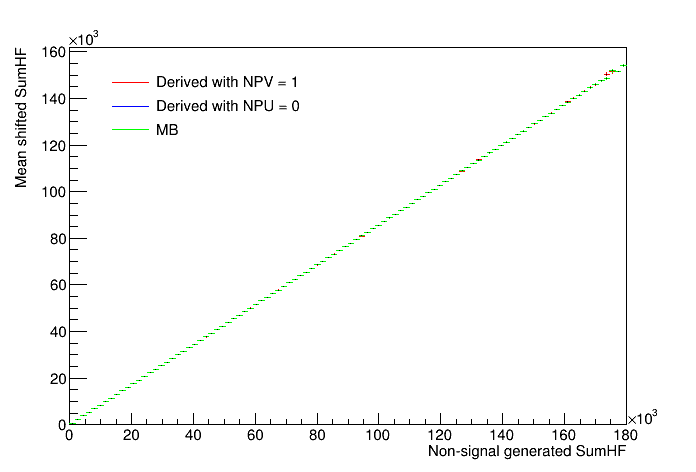

In [21]:
PDYSignalHFVsAll2_NPU = ROOT.TProfile("PDYSignalHFVsAll2_NPU", ";Non-signal generated SumHF;Mean shifted SumHF", 100, 0, 180000)
PDYSignalHFVsAll2_NPV = ROOT.TProfile("PDYSignalHFVsAll2_NPV", "", 100, 0, 180000)

PDYSignalHFVsAll2_NPU.SetLineColor(ROOT.kBlue)
PDYSignalHFVsAll2_NPV.SetLineColor(ROOT.kRed)

PDYSignalHFVsAll2_NPU.SetStats(0)
PDYSignalHFVsAll2_NPV.SetStats(0)

TreeDYReco.Draw("SignalHF-NPUZPTShift-NPUHFShift:SubEventAllHF-SubEvent0HF>>PDYSignalHFVsAll2_NPU", "zPt[0] > 20", "prof")
TreeDYReco.Draw("SignalHF-NPVZPTShift-NPVHFShift:SubEventAllHF-SubEvent0HF>>PDYSignalHFVsAll2_NPV", "zPt[0] > 20", "prof same")
PMBSignalHFVsAll.Draw("same")

Legend = ROOT.TLegend(0.15, 0.85, 0.45, 0.70)
Legend.SetFillStyle(0)
Legend.SetTextFont(42)
Legend.SetTextSize(0.035)
Legend.SetBorderSize(0)
Legend.AddEntry(PDYSignalHFVsAll2_NPV, "Derived with NPV = 1", "l")
Legend.AddEntry(PDYSignalHFVsAll2_NPU, "Derived with NPU = 0", "l")
Legend.AddEntry(PMBSignalHFVsAll, "MB", "l")
Legend.Draw()

Canvas.Draw()

Warning in <TFile::Append>: Replacing existing TH1: HDiffSignalHFVsAll2_NPU (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HDiffSignalHFVsAll2_NPV (Potential memory leak).


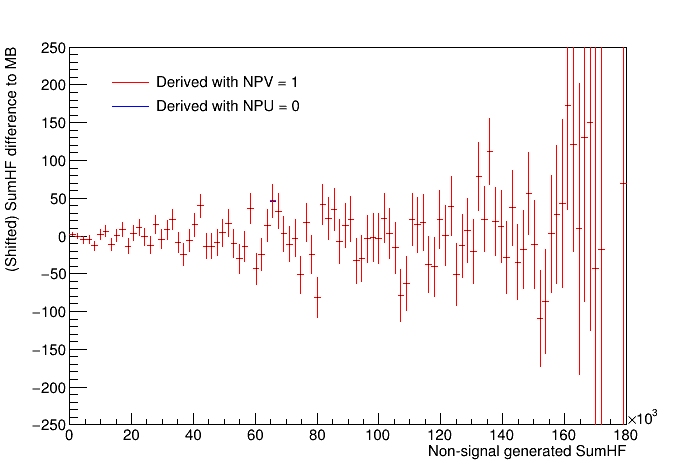

In [22]:
HDiffSignalHFVsAll2_NPU = ROOT.TH1D("HDiffSignalHFVsAll2_NPU", ";Non-signal generated SumHF;(Shifted) SumHF difference to MB", 100, 0, 180000)
HDiffSignalHFVsAll2_NPV = ROOT.TH1D("HDiffSignalHFVsAll2_NPV", "", 100, 0, 180000)
for i in range(1, 101):
    HDiffSignalHFVsAll2_NPU.SetBinContent(i, PDYSignalHFVsAll2_NPU.GetBinContent(i) - PMBSignalHFVsAll.GetBinContent(i))
    HDiffSignalHFVsAll2_NPU.SetBinError(i, math.sqrt(PDYSignalHFVsAll2_NPU.GetBinError(i)**2 + PMBSignalHFVsAll.GetBinError(i)**2))
    HDiffSignalHFVsAll2_NPV.SetBinContent(i, PDYSignalHFVsAll2_NPV.GetBinContent(i) - PMBSignalHFVsAll.GetBinContent(i))
    HDiffSignalHFVsAll2_NPV.SetBinError(i, math.sqrt(PDYSignalHFVsAll2_NPV.GetBinError(i)**2 + PMBSignalHFVsAll.GetBinError(i)**2))
HDiffSignalHFVsAll2_NPU.Draw()
HDiffSignalHFVsAll2_NPV.Draw("same")

HDiffSignalHFVsAll2_NPU.SetLineColor(ROOT.kBlue)
HDiffSignalHFVsAll2_NPV.SetLineColor(ROOT.kRed)

HDiffSignalHFVsAll2_NPU.SetStats(0)
HDiffSignalHFVsAll2_NPU.SetMaximum(250)
HDiffSignalHFVsAll2_NPU.SetMinimum(-250)

Legend = ROOT.TLegend(0.15, 0.85, 0.45, 0.75)
Legend.SetFillStyle(0)
Legend.SetTextFont(42)
Legend.SetTextSize(0.035)
Legend.SetBorderSize(0)
Legend.AddEntry(HDiffSignalHFVsAll2_NPV, "Derived with NPV = 1", "l")
Legend.AddEntry(HDiffSignalHFVsAll2_NPU, "Derived with NPU = 0", "l")
Legend.Draw()

Canvas.SetLogy(False)
Canvas.Draw()

In [24]:
print(f"({FSignalHFVsZPT_NPV1.GetParameter(0)}-{FSignalHFVsZPT_NPV1.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPV1.GetParameter(2)}*zPt[0]))")
print(f"({FDiffSignalHFVsAll_NPV.GetParameter(0)})")
print(f"({FSignalHFVsZPT_NPV1.GetParameter(0)+FDiffSignalHFVsAll_NPV.GetParameter(0)}-{FSignalHFVsZPT_NPV1.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPV1.GetParameter(2)}*zPt[0]))")

(763.1539360425459-101.2995115409047*exp(-0.09666472578946463*zPt[0]))
(-82.36975543861207)
(680.7841806039338-101.2995115409047*exp(-0.09666472578946463*zPt[0]))


In [27]:
print(f"({FSignalHFVsZPT_NPU0.GetParameter(0)}-{FSignalHFVsZPT_NPU0.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPU0.GetParameter(2)}*zPt[0]))")
print(f"({FDiffSignalHFVsAll_NPU.GetParameter(0)})")
print(f"({FSignalHFVsZPT_NPU0.GetParameter(0)+FDiffSignalHFVsAll_NPU.GetParameter(0)}-{FSignalHFVsZPT_NPU0.GetParameter(1)}*exp(-{FSignalHFVsZPT_NPU0.GetParameter(2)}*zPt[0]))")

(744.3082850142206-100.10354951421574*exp(-0.10119138423883632*zPt[0]))
(-64.06741623945045)
(680.2408687747701-100.10354951421574*exp(-0.10119138423883632*zPt[0]))


In [31]:
FSignalHFVsZPT_NPU0.GetParameter(0)+FDiffSignalHFVsAll_NPU.GetParameter(0)-FSignalHFVsZPT_NPU0.GetParameter(1)*math.exp(-FSignalHFVsZPT_NPU0.GetParameter(2)*40)

678.4927333019886